# Test for using energinet dataset

### Need for runnning colab

In [1]:
!pip install torch torchvision torchaudio pandas numpy scikit-learn

from google.colab import files
uploaded = files.upload()



Saving ConsumptionIndustry.csv to ConsumptionIndustry.csv


## Importing Data

In [4]:
import pandas as pd

# Correct the file path to the actual location of the CSV file
# df = pd.read_csv('/Users/casper/Documents/GitHub/p9-energy/Dataset/ConsumptionIndustry.csv', sep=';')

df = pd.read_csv('ConsumptionIndustry.csv', sep=';')


print(df.head())
print('\n')
print(df.tail())
print('\n')
print(df.info())
print('\n')

            HourUTC            HourDK  MunicipalityNo Branche ConsumptionkWh
0  2021-01-01 00:00  2021-01-01 01:00             851  Privat   35086,772000
1  2021-01-01 01:00  2021-01-01 02:00             851  Privat   31777,762000
2  2021-01-01 02:00  2021-01-01 03:00             851  Privat   28423,659000
3  2021-01-01 03:00  2021-01-01 04:00             851  Privat   25675,926000
4  2021-01-01 04:00  2021-01-01 05:00             851  Privat   24283,909000


                HourUTC            HourDK  MunicipalityNo Branche  \
33834  2024-11-10 18:00  2024-11-10 19:00             851  Privat   
33835  2024-11-10 19:00  2024-11-10 20:00             851  Privat   
33836  2024-11-10 20:00  2024-11-10 21:00             851  Privat   
33837  2024-11-10 21:00  2024-11-10 22:00             851  Privat   
33838  2024-11-10 22:00  2024-11-10 23:00             851  Privat   

      ConsumptionkWh  
33834   48584,696000  
33835   44105,371000  
33836   41492,172000  
33837   37148,073000  
33838 

### Plotting test data

<ipython-input-20-6b7738555468>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = filtered_df['HourDK'].dt.date
<ipython-input-20-6b7738555468>:14: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_end_dates = pd.date_range(start=filtered_df['HourDK'].min(),


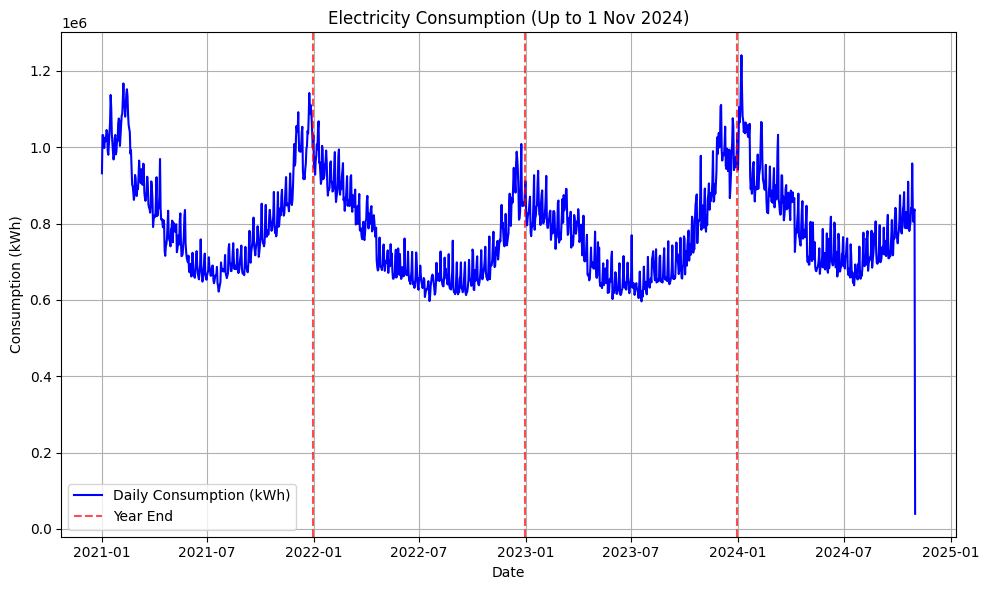

In [20]:
import matplotlib.pyplot as plt

# Convert HourUTC to datetime
df['HourDK'] = pd.to_datetime(df['HourDK'], format='%Y-%m-%d %H:%M')

# Filter data to include only up to 1 September 2024
end_date = pd.to_datetime('2024-11-1')
filtered_df = df[df['HourDK'] <= end_date]

# Aggregate daily consumption
filtered_df['Date'] = filtered_df['HourDK'].dt.date
daily_consumption = filtered_df.groupby('Date')['ConsumptionkWh'].sum()

year_end_dates = pd.date_range(start=filtered_df['HourDK'].min(),
                               end=filtered_df['HourDK'].max(),
                               freq='A')  # 'A' = year-end frequency

# Plot
plt.figure(figsize=(10, 6))
plt.plot(daily_consumption.index, daily_consumption.values, label='Daily Consumption (kWh)', color='b')
# Add vertical lines for year-end
for date in year_end_dates:
    plt.axvline(x=date, color='r', linestyle='--', alpha=0.7, label='Year End' if date == year_end_dates[0] else "")
plt.title('Electricity Consumption (Up to 1 Nov 2024)')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()